## SMS Spam Collection ## 

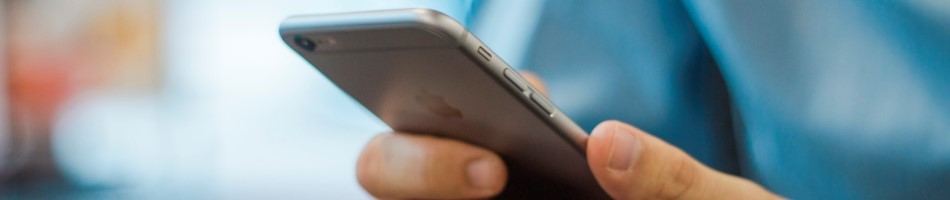

## Abstract: ##
* The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.
* It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Purpose of Analysis: ##
* To find the frequencies of words in the spam and non-spam messages.
* The words of the messages will be the model features

## Structure: ##
* Part1: Libraries for doing EDA process
* Part2: Exploring the Dataset
* Part3: Visualisation of Data
* Part4: Preparing the data for Predictive Analysis- Multinomial Naive Bayes

    - Importing required libraries
    - Adding an extra column for Spam count
    - Splitting the data
    - Creating model for prediction
* Part 5: Conculsion

## Importing libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the data

In [2]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploring Data:

In [3]:
df.shape

(5572, 5)

In [4]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## Droping column

In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
d=df.copy()
d

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
des=d.groupby('Category').describe()
des

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [11]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

## Adding an extra column

In [12]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Visualization of data

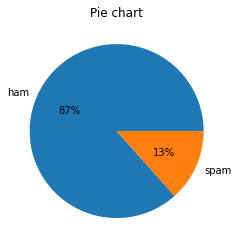

In [13]:
count_Category=pd.value_counts(df["Category"], sort= True)
count_Category.plot(kind = 'pie',autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

### In this 13% of the messages are spam

## Spliting the dataset : trained and test sets for creating model for Predictve Analysis

In [14]:
X=df.Message
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
y=df.spam
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: int64

## Importing libraries
* For spliting the data
* For creating the model
* For ploting the visualization of model perfectness

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
v=CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Importing NaiveBayes Classifier for the model

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [20]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9838565022421525

### accuracy score is 98%

In [21]:
y_predict=model.predict(X_test_count)

#### The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [22]:
from sklearn.pipeline import Pipeline
sms= Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [23]:
sms.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [24]:
sms.score(X_test,y_test)

0.9838565022421525

## For visualizing how accurate the data is by checking the confusionmatrix

In [25]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
performance=confusion_matrix(y_test,y_predict)
performance

array([[971,   4],
       [ 14, 126]], dtype=int64)

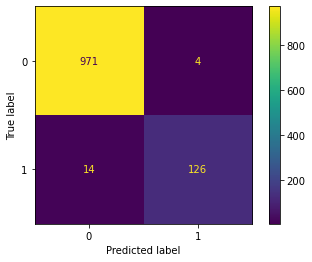

In [26]:
plot_confusion_matrix(model,X_test_count,y_test)
plt.show()

## predicting the spam from the data passed

In [27]:
message = [
    'URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
   "I HAVE A DATE ON SUNDAY WITH WILL!!",
    "up to 20 % off"]
msg_count = v.transform(message)
model.predict(msg_count)

array([1, 0, 0], dtype=int64)

In [28]:
sms.predict(message)

array([1, 0, 0], dtype=int64)

## Conclusion:
* In this 13% of the messages are spam
* The model is 98% accuratE for predicting the spam